In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = r"D:\Lung cancer\survey lung cancer.csv"
data = pd.read_csv(file_path)

# Data preprocessing
# Convert gender to binary (M=1, F=0)
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 0})

# Convert categorical features (2 -> 0) except AGE
categorical_features = data.columns.drop(['GENDER', 'AGE', 'LUNG_CANCER'])
for feature in categorical_features:
    data[feature] = data[feature].replace({2: 0})

# Convert target variable to binary
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Split data into features and target
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance analysis
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(feature_importances.sort_values(ascending=False))

Accuracy: 0.967741935483871

Confusion Matrix:
[[ 1  1]
 [ 1 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


Feature Importances:
AGE                      0.194796
ALLERGY                  0.086500
ALCOHOL CONSUMING        0.086340
PEER_PRESSURE            0.075392
YELLOW_FINGERS           0.068621
ANXIETY                  0.060863
FATIGUE                  0.060182
SWALLOWING DIFFICULTY    0.060115
COUGHING                 0.055377
CHRONIC DISEASE          0.049351
WHEEZING                 0.042860
SHORTNESS OF BREATH      0.042158
CHEST PAIN               0.041626
GENDER                   0.039941
SMOKING                  0.035879
dtype: float64


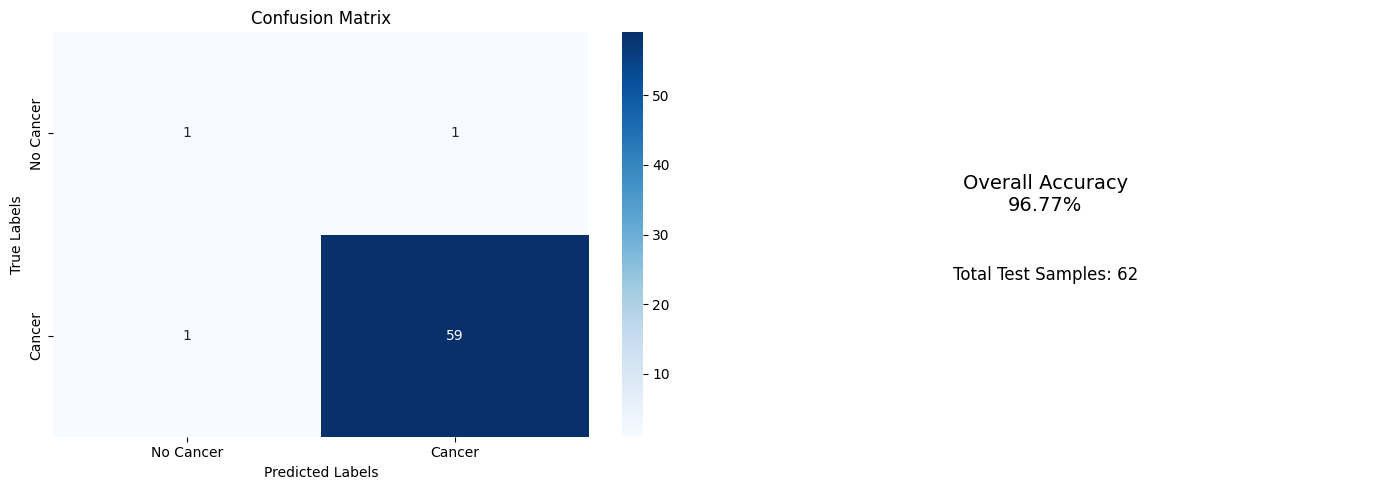

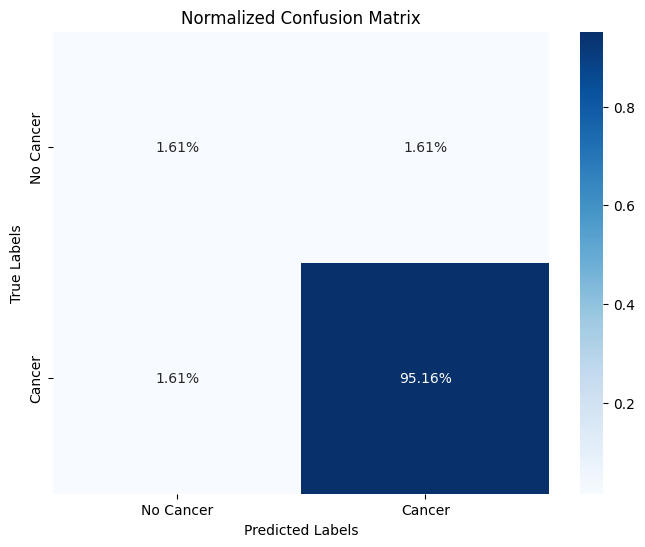

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# After your existing evaluation code
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Create a figure with two subplots
plt.figure(figsize=(14, 5))

# Confusion Matrix Visualization
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Cancer', 'Cancer'], 
            yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Accuracy Visualization
plt.subplot(1, 2, 2)
plt.text(0.5, 0.6, f'Overall Accuracy\n{accuracy:.2%}', 
         fontsize=14, ha='center', va='center')
plt.text(0.5, 0.4, f'Total Test Samples: {len(y_test)}', 
         fontsize=12, ha='center', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()

# Additional detailed visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues',
            xticklabels=['No Cancer', 'Cancer'], 
            yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()